In [1]:
using Plots

In [2]:
const mode = 2

include("src/low_level_bsplines.jl")
include("src/maxwell_1d_fem.jl")

const eta1_min = .0
const eta1_max = 2π
const nc_eta1  = 128
Lx = eta1_max - eta1_min
delta_eta1 = Lx / nc_eta1
domain = [eta1_min, eta1_max]
deg = 3

maxwell_1d = Maxwell1DFEM(domain, nc_eta1, deg);

In [4]:
ex = zeros(Float64, nc_eta1)
ey = zeros(Float64, nc_eta1)
bz = zeros(Float64, nc_eta1)

bz_exact = zeros(Float64, nc_eta1)
ex_exact = zeros(Float64, nc_eta1)
ey_exact = zeros(Float64, nc_eta1)
rho      = zeros(Float64, nc_eta1)
sval     = zeros(Float64, nc_eta1)

cos_k(x) = cos(mode*2*pi*x/Lx) 
sin_k(x) = sin(mode*2*pi*x/Lx) 

# Test Poisson
#-------------
# Set exact solution
for i = 1:nc_eta1
   xi = eta1_min + (i-1)*delta_eta1
   ex_exact[i] = sin_k(xi)/(2.0*mode*pi/Lx)
end

x = range(eta1_min , stop=eta1_max, length=nc_eta1+1)[1:end-1] |> collect;

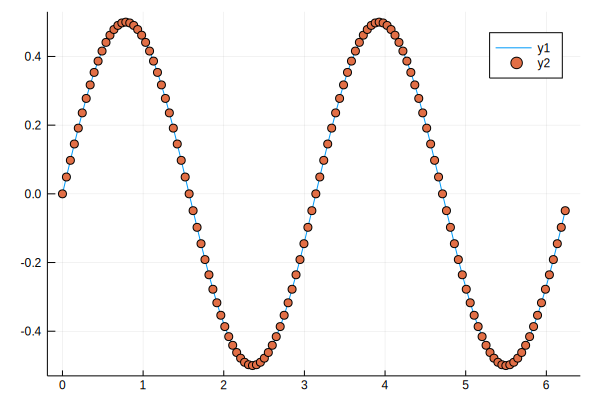

In [6]:
compute_rhs_from_function( maxwell_1d, cos_k, deg, rho)

compute_e_from_rho( maxwell_1d, ex, rho ) 

plot(x, ex_exact)
sval = eval_uniform_periodic_spline_curve(deg-1, ex)

scatter!(x, sval)

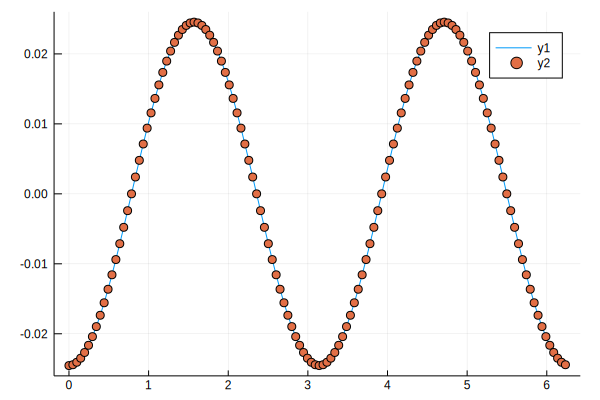

In [11]:
dt = .5 * delta_eta1

for i = 1:nc_eta1
   xi = eta1_min + (i-1)*delta_eta1
   ex_exact[i] = - cos_k(xi)*dt
end

compute_rhs_from_function(maxwell_1d, cos_k, deg-1, rho)
fill!(ex, 0.0)
compute_e_from_j(maxwell_1d, dt .* rho, 1, ex )
sval =  eval_uniform_periodic_spline_curve(deg-1, ex)

plot(x, ex_exact)
scatter!(x, sval)